# Multiple Linear Regression
## Bike Sharing Assignment

#### Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.
They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. 

##### Requirement:
1. Which variables are significant in predicting the demand for shared bike ?
2. How well those variables describe the bike demands ?

##### What we need to do:
1. Create a linear model that describe the effect of various features on demand.
2. The model should be interpretable so that the management can understand it.

##### Dataset
day.csv has the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : wheather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

## Step 1: Reading and Understanding the Data



In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the libraries 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [3]:
# Read the data from day.csv

df = pd.read_csv("day.csv")

In [4]:
# Check the head of the dataset

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Inspect the various aspects of the dataframe

In [5]:
# Checking the shape of the dataset

df.shape

(730, 16)

In [6]:
# Checking the info of the columns present in dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Descrbing the columns in dataset

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# Checking for the null values in column data

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# EDA: Data Cleaning

# Filtering columns which should be dropped from the dataset which have NA only
# Last step confirmed that there is no null value. Even df.info confirmed the same.
# Otherwise we could use df.dropna to clean the dataset

df.dropna(how='all', axis='columns', inplace=True) 

In [10]:
# Checking the shape. There is no change in shape in this case.

df.shape

(730, 16)

In [11]:
# Dropping the duplicate rows

df.drop_duplicates(inplace=True)

In [12]:
# Checking the shape. There is no change in shape in this case.

df.shape

(730, 16)

In [13]:
# Dropping unnecessary columns:
# instant - this has indexes for the row
# dteday - this has date which can be compensated by year and month column
# casual and registered - this is breakup for cnt column, may cause data leakage since these are continuos features

columns_to_drop = ["instant", "dteday", "casual", "registered"]
df.drop(columns_to_drop, axis = 1, inplace = True)


In [14]:
# Checking the shape.

df.shape

(730, 12)

In [15]:
# Renaming a few columns to have this easy to read and understand

df.rename(columns={'yr' : 'year', 'mnth' : 'month', 'hum' : 'humidity'}, inplace=True)

In [16]:
# Describing and printing the head for dataframe after the columns have been renamed
df.describe()


,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [17]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
# Mapping the season column

df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [19]:
# Mapping the month column

df.month = df.month.map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'june', 7:'july', 
                         8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})

In [20]:
# Mapping the weekday column

df.weekday = df.weekday.map({0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'})

In [21]:
# Mapping the weathersit column

df.weathersit = df.weathersit.map({1:'Clear', 2:'Misty', 3:'Light_snow_rain', 4:'Heavy_snow_rain'})

In [22]:
# Mapping the year column

#df.year = df.year.map({0: 2018, 1: 2019})

In [23]:
# Checking the head of the dataset

df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [24]:
# Checking the column info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 74.1+ KB


# Step 2: Visualising the Data

### (a) Visualising Numeric Variables
#### Columns with continuous numerical values (non-categorical) are: ["temp", "atemp", "humidity", "windspeed", "cnt"]

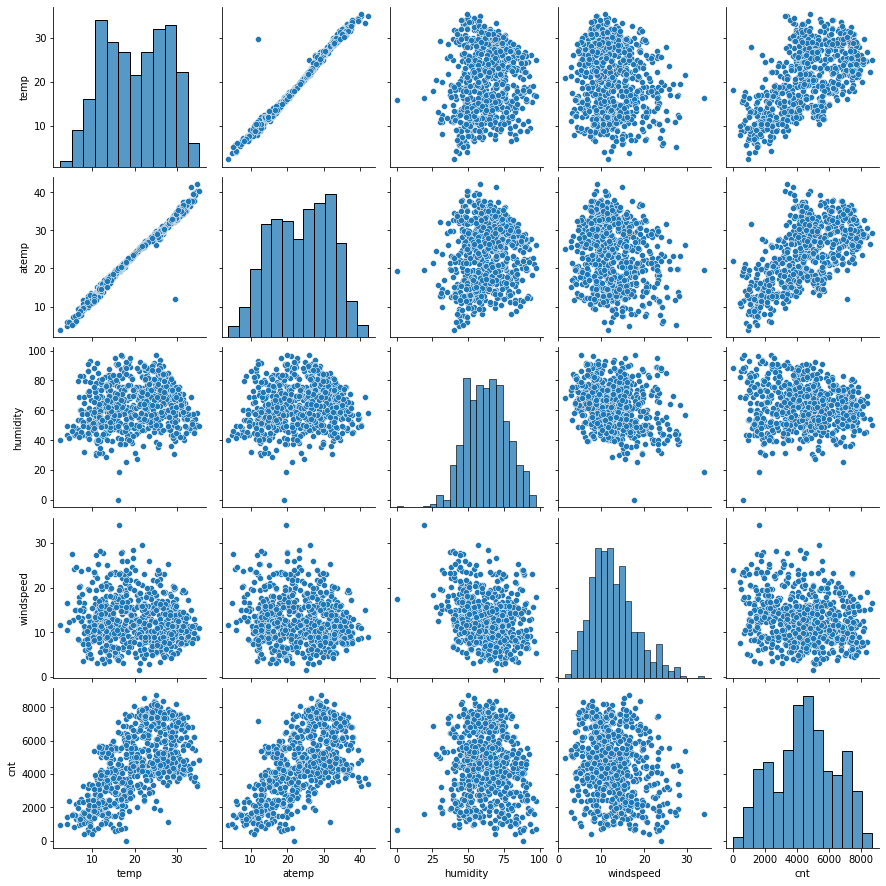

In [25]:
# Visualising Numeric Variables
sns.pairplot(data=df,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

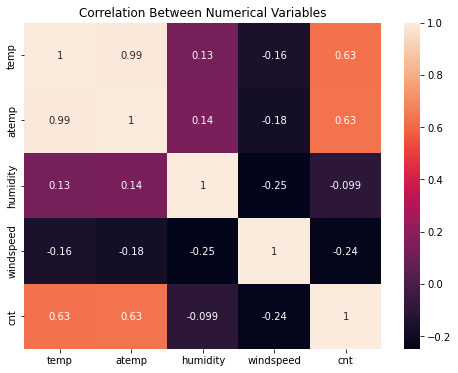

In [26]:
# Checking the correlation coefficients between numerical variables to confirm on their correlation

plt.figure(figsize = (8, 6))
sns.heatmap(df[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True)
plt.title("Correlation Between Numerical Variables")
plt.show()

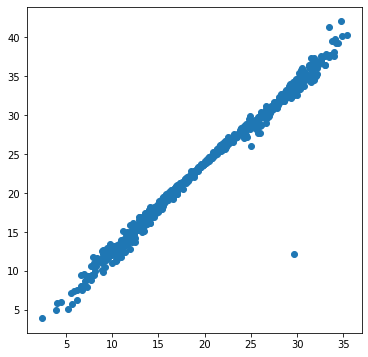

In [27]:
plt.figure(figsize=[6,6])
plt.scatter(df.temp, df.atemp)
plt.show()

#### We could see that atemp and temp are highly corelated and hence one should be removed due to multicolineaity.
#### In later analysis, we will decide which one should be kept and which one should be removed.

###
### (b) Visualising Categorical Variables
#### Columns with categorical data are: ["season", "year", "month", "holiday", "workingday", "weathersit"]

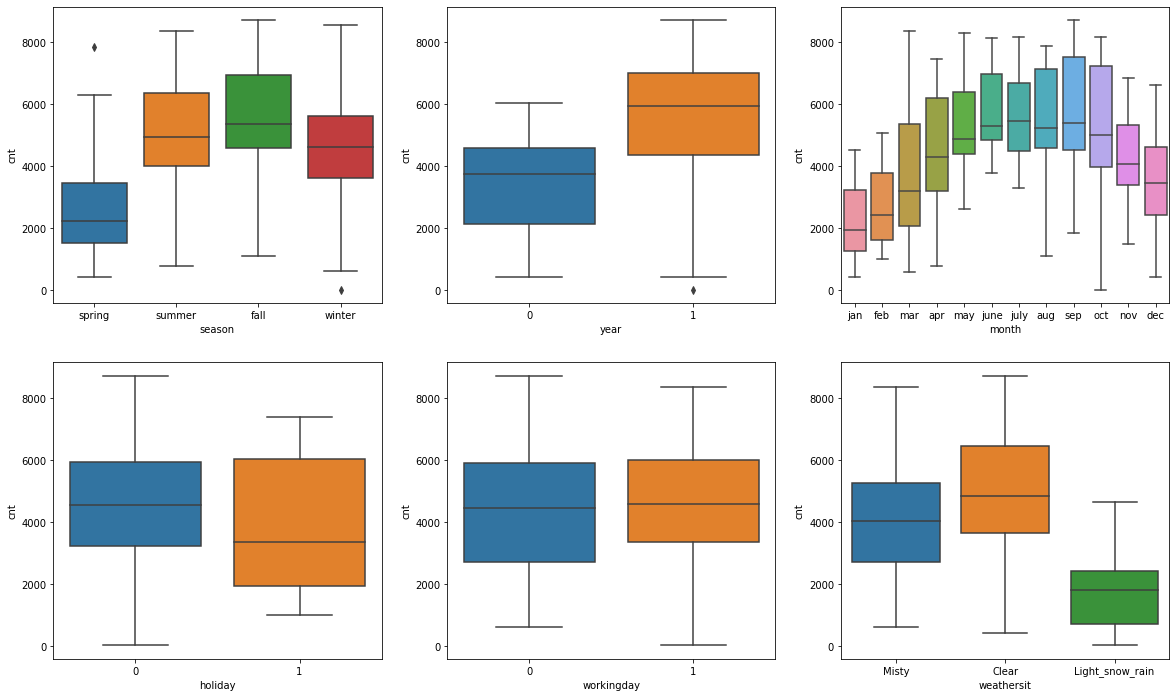

In [28]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = "season", y = "cnt", data = df)
plt.subplot(2,3,2)
sns.boxplot(x = "year", y = "cnt", data = df)
plt.subplot(2,3,3)
sns.boxplot(x = "month", y = "cnt", data = df)
plt.subplot(2,3,4)
sns.boxplot(x = "holiday", y = "cnt", data = df)
plt.subplot(2,3,5)
sns.boxplot(x = "workingday", y = "cnt", data = df)
plt.subplot(2,3,6)
sns.boxplot(x = "weathersit", y = "cnt", data = df)
plt.show()

#### Visualising these categorical features parallely with year by using the hue argument.

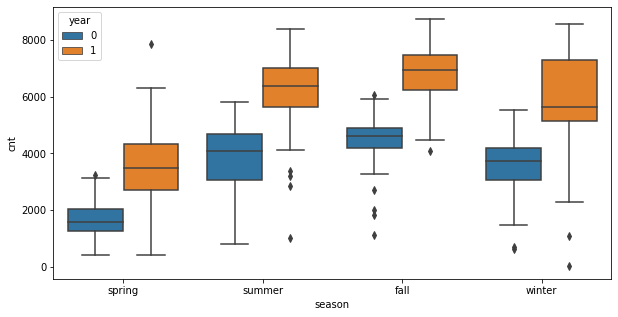

In [29]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = "season", y = "cnt", hue = "year", data = df)
plt.show()

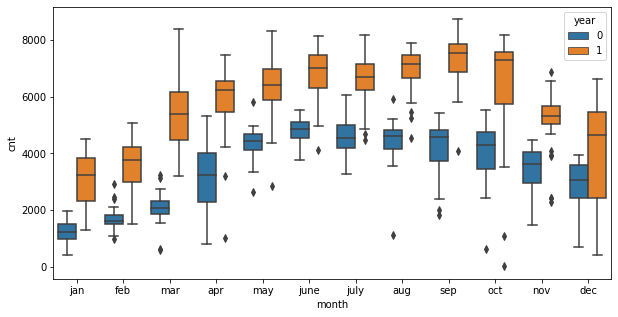

In [30]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = "month", y = "cnt", hue = "year", data = df)
plt.show()

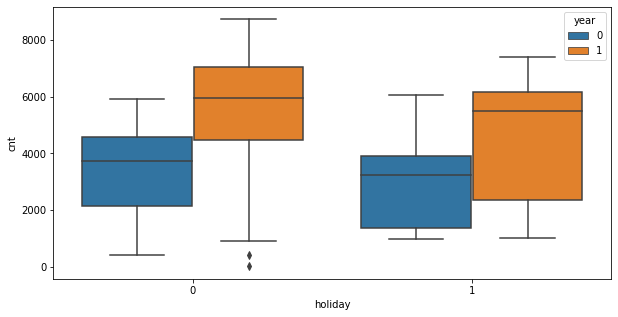

In [31]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = "holiday", y = "cnt", hue = "year", data = df)
plt.show()

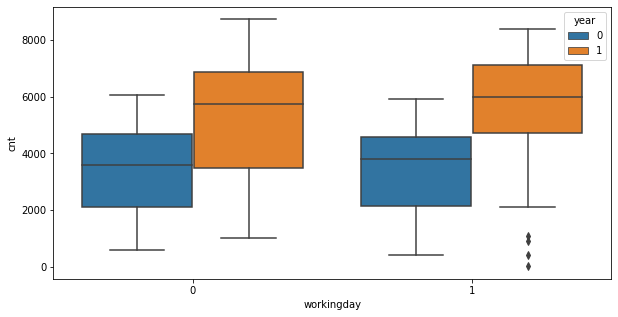

In [32]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = "workingday", y = "cnt", hue = "year", data = df)
plt.show()

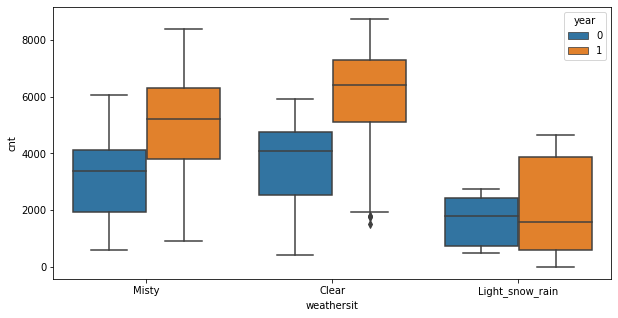

In [33]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = "weathersit", y = "cnt", hue = "year", data = df)
plt.show()

#### We could see some patterns here:
1. "fall" has on an average higher "cnt" than other seasons. 2019 has an increase over 2018.
2. Bookings during the month of may, june, july, aug, sep and oct is more as compared to other months.
Trend increased starting of the year till mid of the year and then it started decreasing as we approached the end of year. 
3. Months in 2019 have more bookings as each months in 2018.
4. "2019" year has on an average higher "cnt" when compared to "2018".
5. When weather situation is "Clear", "cnt" is a little higher as compared to other weather situations. "2019" has an increase over "2018".

# Step 3: Data Preparation

In [34]:
# Check the head of the dataset
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [35]:
# Creating Dummy Variables for categorical variables 
seasons_df = pd.get_dummies(df.season,drop_first=True)
months_df = pd.get_dummies(df.month,drop_first=True)
weekdays_df = pd.get_dummies(df.weekday,drop_first=True)
weathersit_df = pd.get_dummies(df.weathersit,drop_first=True)

In [36]:
# Concatinating dummy variables to the original df dataframe
df = pd.concat([df, seasons_df, months_df, weekdays_df, weathersit_df], axis = 1)

# Check the head of the dataset
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow_rain,Misty
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [37]:
# Check info of the datframe after adding dummies
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           730 non-null    object 
 1   year             730 non-null    int64  
 2   month            730 non-null    object 
 3   holiday          730 non-null    int64  
 4   weekday          730 non-null    object 
 5   workingday       730 non-null    int64  
 6   weathersit       730 non-null    object 
 7   temp             730 non-null    float64
 8   atemp            730 non-null    float64
 9   humidity         730 non-null    float64
 10  windspeed        730 non-null    float64
 11  cnt              730 non-null    int64  
 12  spring           730 non-null    uint8  
 13  summer           730 non-null    uint8  
 14  winter           730 non-null    uint8  
 15  aug              730 non-null    uint8  
 16  dec              730 non-null    uint8  
 17  feb             

In [38]:
# Drop unnecessary columns after creation of dummies
df.drop(["season", "month", "weekday", "weathersit"], axis = 1, inplace = True)

In [39]:
# Check the head of the dataset
df.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow_rain,Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [40]:
# Check info of the dataframe after adding dummies
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   atemp            730 non-null    float64
 5   humidity         730 non-null    float64
 6   windspeed        730 non-null    float64
 7   cnt              730 non-null    int64  
 8   spring           730 non-null    uint8  
 9   summer           730 non-null    uint8  
 10  winter           730 non-null    uint8  
 11  aug              730 non-null    uint8  
 12  dec              730 non-null    uint8  
 13  feb              730 non-null    uint8  
 14  jan              730 non-null    uint8  
 15  july             730 non-null    uint8  
 16  june             730 non-null    uint8  
 17  mar             

In [41]:
# Describe the dataframe after adding dummies
df.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow_rain,Misty
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,...,0.084932,0.082192,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096,0.028767,0.336986
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,...,0.278971,0.274845,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359,0.167266,0.473004
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Step 4: Splitting the Data into Training and Testing Sets


In [42]:
# Splitting the Data into Training and Testing Sets

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [43]:
# Checking shape for training dataframe
df_train.shape

(510, 30)

In [44]:
# Checking shape for testing dataframe
df_test.shape

(219, 30)

#### Rescaling the Features

In [45]:
scaler = MinMaxScaler()

In [46]:
# Applying scaler to initially identified numerical variables (in Step 2)
# All these are the one's except 'yes-no' and 'dummy' variables

numerical_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[numerical_vars] = scaler.fit_transform(df_train[numerical_vars])

In [47]:
# Checking the head of the training dataset
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow_rain,Misty
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1


In [48]:
# Describe the training dataset
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow_rain,Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


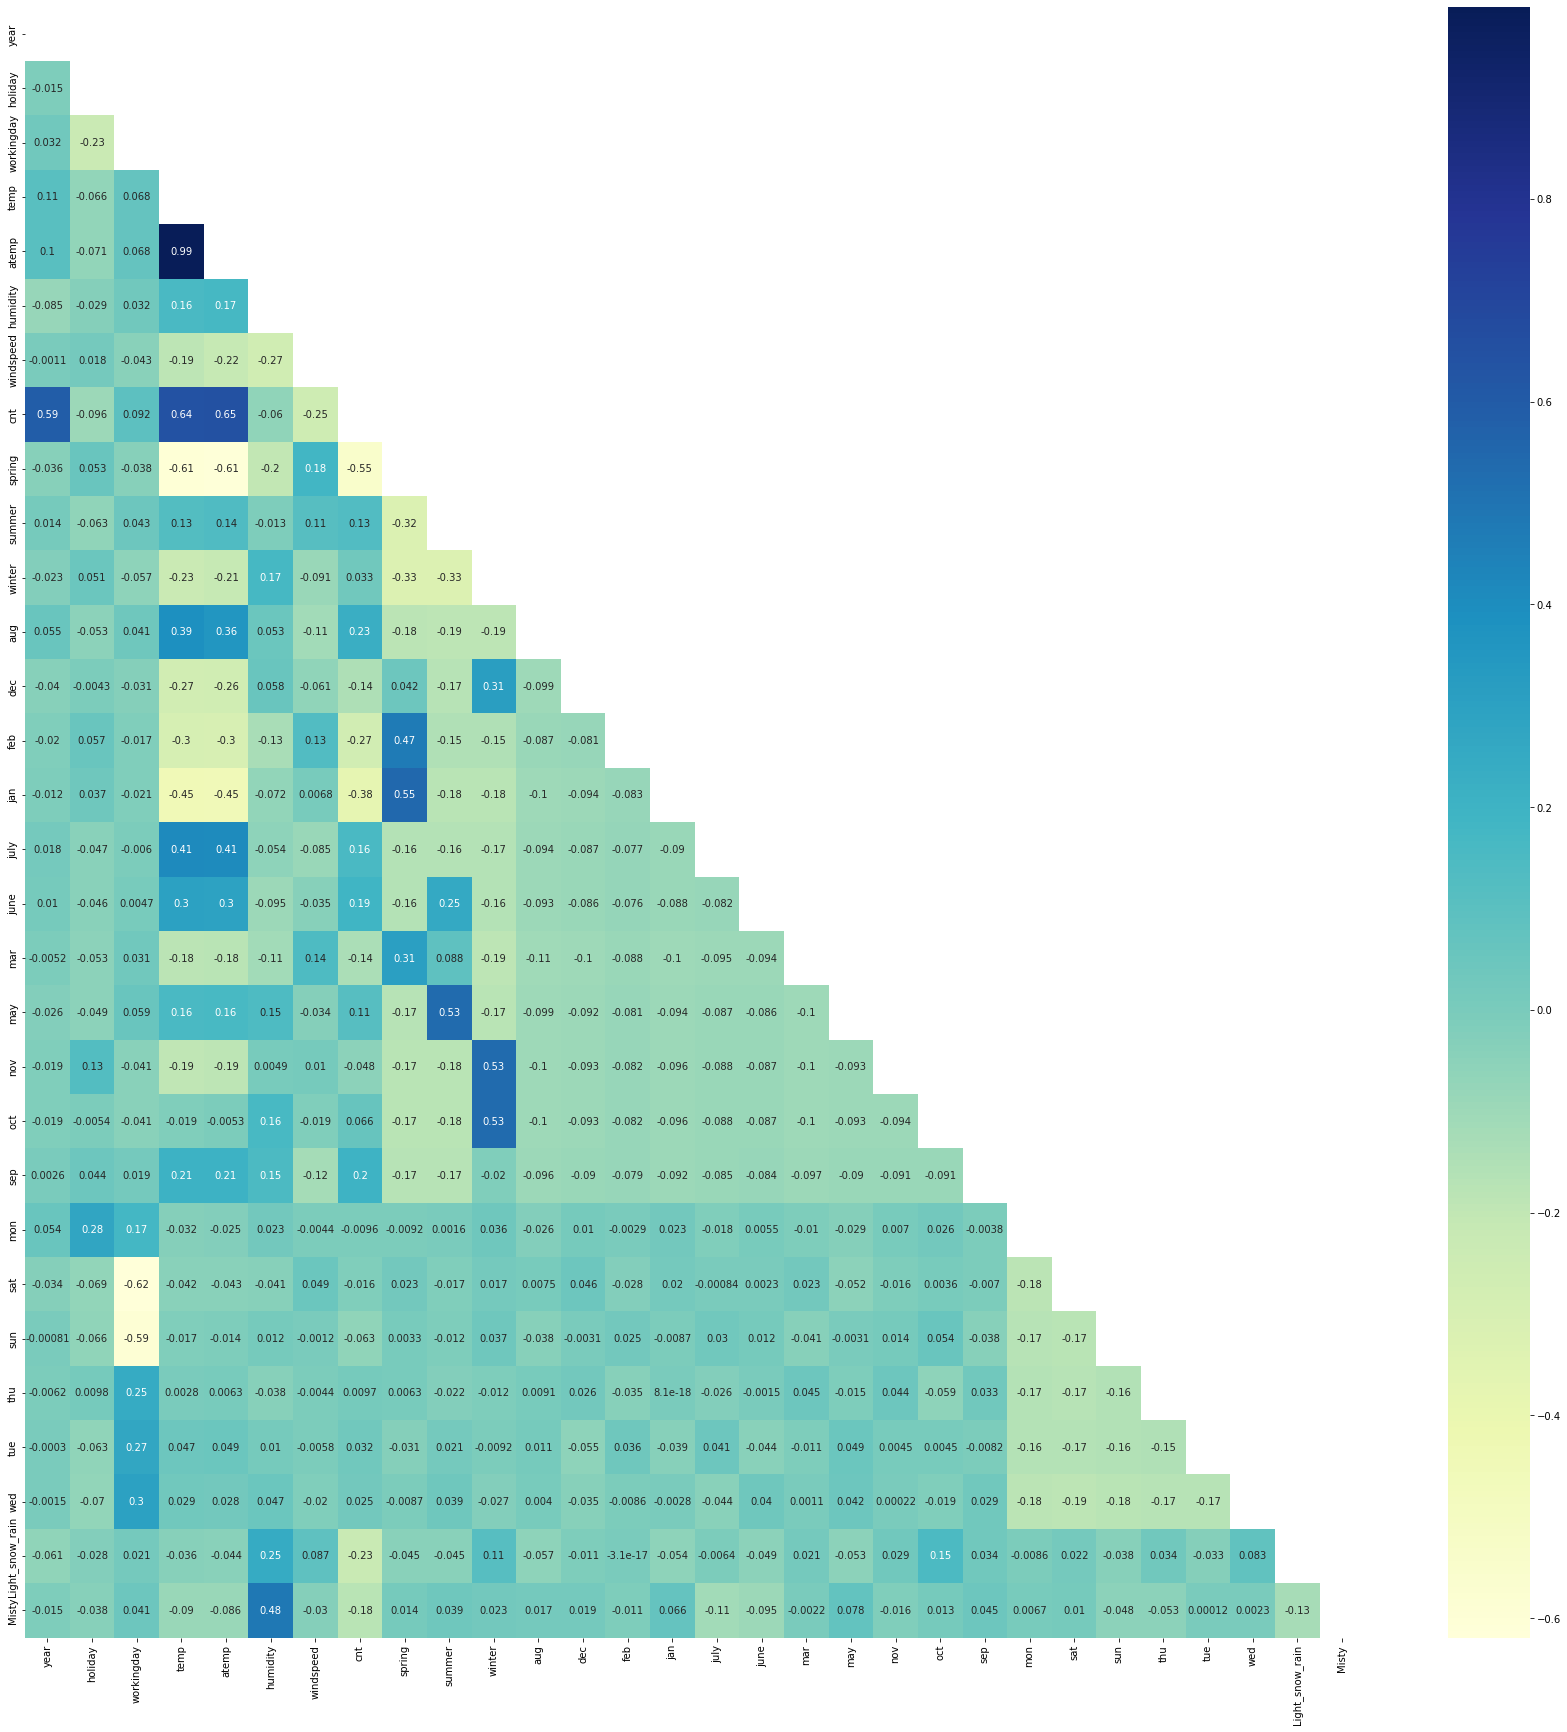

In [49]:
# Checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 30))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu", mask=matrix)
plt.show()

#### Building our model
#### Recursive feature elimination [RFE]

In [50]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

In [51]:
# Recursive feature elimination [RFE]
 
lm = LinearRegression()
lm.fit(X_train, y_train)

# n_features_to_select-> selecting as 15 (len(df.columns)//2)
rfe = RFE(lm, n_features_to_select=15) 
rfe = rfe.fit(X_train, y_train)

In [52]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 8),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 7),
 ('nov', False, 3),
 ('oct', False, 11),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 12),
 ('tue', False, 10),
 ('wed', False, 13),
 ('Light_snow_rain', True, 1),
 ('Misty', True, 1)]

In [53]:
# Selected columns from RFE
col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'spring', 'summer', 'winter', 'july', 'sep', 'sat', 'sun',
       'Light_snow_rain', 'Misty'],
      dtype='object')


In [54]:
# Eliminated columns from RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov', 'oct',
       'mon', 'thu', 'tue', 'wed'],
      dtype='object')

# Step 5: Building a linear model

In [55]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [56]:
# Function to calculate and return VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [57]:
# Calculating VIF for X_train_rfe
calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,50.69
11,sat,12.20
12,sun,11.79
6,spring,5.02
3,temp,3.62
8,winter,3.49
1,holiday,2.91
7,summer,2.61
4,humidity,1.91
14,Misty,1.57


##### We could see here workingday has very high VIF and should be dropped. We will continue with linear model to confirm.

#### Linear Model

In [58]:
# Adding a constant variable 
X_train_lm_1 = sm.add_constant(X_train_rfe)

# Running the linear model
lm1 = sm.OLS(y_train, X_train_lm_1).fit() 

# Summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 08 Jun 2022   Prob (F-statistic):          1.13e-191
Time:                        22:10:38   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1989      0.028     

##### We could see here pretty good values for R-squared and Adj. R-squared

In [59]:
# We could drop workingday due to high VIF in previous run
X_train_new = X_train_rfe.drop(['workingday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,humidity,28.28
2,temp,16.06
4,windspeed,4.68
5,spring,4.03
7,winter,3.37
6,summer,2.78
13,Misty,2.30
0,year,2.08
8,july,1.59
9,sep,1.39


In [60]:
# Adding a constant variable
X_train_lm2 = sm.add_constant(X_train_new)

# Running the new linear model
lm2 = sm.OLS(y_train, X_train_lm2).fit() 

# Summary of new linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 08 Jun 2022   Prob (F-statistic):          1.13e-191
Time:                        22:10:38   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2826      0.034     

#### We could see there is no change R squared and Adj. R squared.

In [61]:
# We could drop humidity due to high VIF and p value in previous run
X_train_new = X_train_new.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.18
3,windspeed,4.62
5,summer,2.23
4,spring,2.13
0,year,2.07
6,winter,1.84
7,july,1.59
12,Misty,1.55
8,sep,1.34
9,sat,1.23


##### Now we see all features have low VIF values

In [62]:
# Adding a constant variable
X_train_lm3 = sm.add_constant(X_train_new)


# Running the new linear model
lm3 = sm.OLS(y_train, X_train_lm3).fit() 

# Summary of new linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Wed, 08 Jun 2022   Prob (F-statistic):          5.73e-189
Time:                        22:10:38   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2039      0.029     

In [63]:
# We could have dropped temp due to high VIF value in previous run.
# But it has coefficient as 0.4920. Also tested Adj. R-squared value after dropping and it fell down to 0.764 from 0.838.
# Hence not dropping for now.

# Dropping sat for now on account of high p value.
X_train_new = X_train_new.drop(['sat'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.14
3,windspeed,4.60
5,summer,2.22
4,spring,2.11
0,year,2.07
6,winter,1.82
7,july,1.59
11,Misty,1.55
8,sep,1.34
9,sun,1.18


In [64]:
# Adding a constant variable
X_train_lm4 = sm.add_constant(X_train_new)

# Running the new linear model
lm4 = sm.OLS(y_train, X_train_lm4).fit() 

# Summary of new linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Wed, 08 Jun 2022   Prob (F-statistic):          6.45e-190
Time:                        22:10:38   Log-Likelihood:                 508.10
No. Observations:                 510   AIC:                            -990.2
Df Residuals:                     497   BIC:                            -935.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2063      0.029     

In [65]:
# Dropping july for now on account of high p value.
X_train_new = X_train_new.drop(['july'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.59
2,temp,3.91
0,year,2.07
4,spring,2.02
5,summer,1.90
6,winter,1.66
10,Misty,1.55
7,sep,1.23
8,sun,1.18
9,Light_snow_rain,1.08


In [66]:
# Adding a constant variable
X_train_lm5 = sm.add_constant(X_train_new)

# Running the new linear model
lm5 = sm.OLS(y_train, X_train_lm5).fit() 

# Summary of new linear model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     236.1
Date:                Wed, 08 Jun 2022   Prob (F-statistic):          1.51e-189
Time:                        22:10:38   Log-Likelihood:                 504.38
No. Observations:                 510   AIC:                            -984.8
Df Residuals:                     498   BIC:                            -933.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1983      0.029     

In [67]:
# Dropping spring for now on account of high p value.
X_train_new = X_train_new.drop(['spring'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,3.72
3,windspeed,3.08
0,year,2.00
4,summer,1.56
9,Misty,1.48
5,winter,1.39
6,sep,1.21
7,sun,1.16
8,Light_snow_rain,1.08
1,holiday,1.04


In [68]:
# Adding a constant variable
X_train_lm6 = sm.add_constant(X_train_new)

# Running the new linear model
lm6 = sm.OLS(y_train, X_train_lm6).fit() 

# Summary of new linear model
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.0
Date:                Wed, 08 Jun 2022   Prob (F-statistic):          2.88e-189
Time:                        22:10:38   Log-Likelihood:                 500.84
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     499   BIC:                            -933.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1350      0.017     

##### Now we could see that neither VIF nor p value has high values which should be reason for dropping a feature. 
##### So we can go ahead with residual analysis.

# Step 6: Residual Analysis of the train data

In [69]:
# Printing training dataset we got out of model building 
X_train_lm6

,const,year,holiday,temp,windspeed,summer,winter,sep,sun,Light_snow_rain,Misty
653,1.0,1,0,0.509887,0.300794,0,1,0,0,0,0
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.663106,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,1,0,0,0,0,1
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,1,0,0,0,1


In [70]:
# Printing y predicted we got out of model building
y_train_pred = lm6.predict(X_train_lm6)
print (y_train_pred)

653    0.732831
576    0.773104
426    0.488702
728    0.350215
482    0.559985
         ...   
526    0.769038
578    0.811679
53     0.228764
350    0.255069
79     0.311710
Length: 510, dtype: float64


#### Error Terms

Text(0.5, 0, 'Errors')

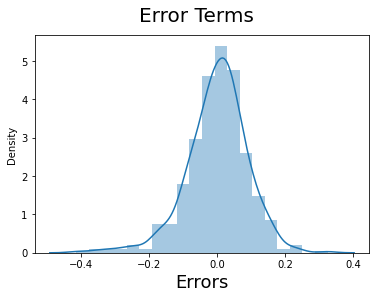

In [71]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)

# Plot heading 
fig.suptitle('Error Terms', fontsize = 20) 

# X-label
plt.xlabel('Errors', fontsize = 18)    

##### Error terms seems to be having normal distribution.

### Multicollinearity

In [72]:
# Current VIF for the model
calculateVIF(X_train_new)

,Features,VIF
2,temp,3.72
3,windspeed,3.08
0,year,2.00
4,summer,1.56
9,Misty,1.48
5,winter,1.39
6,sep,1.21
7,sun,1.16
8,Light_snow_rain,1.08
1,holiday,1.04


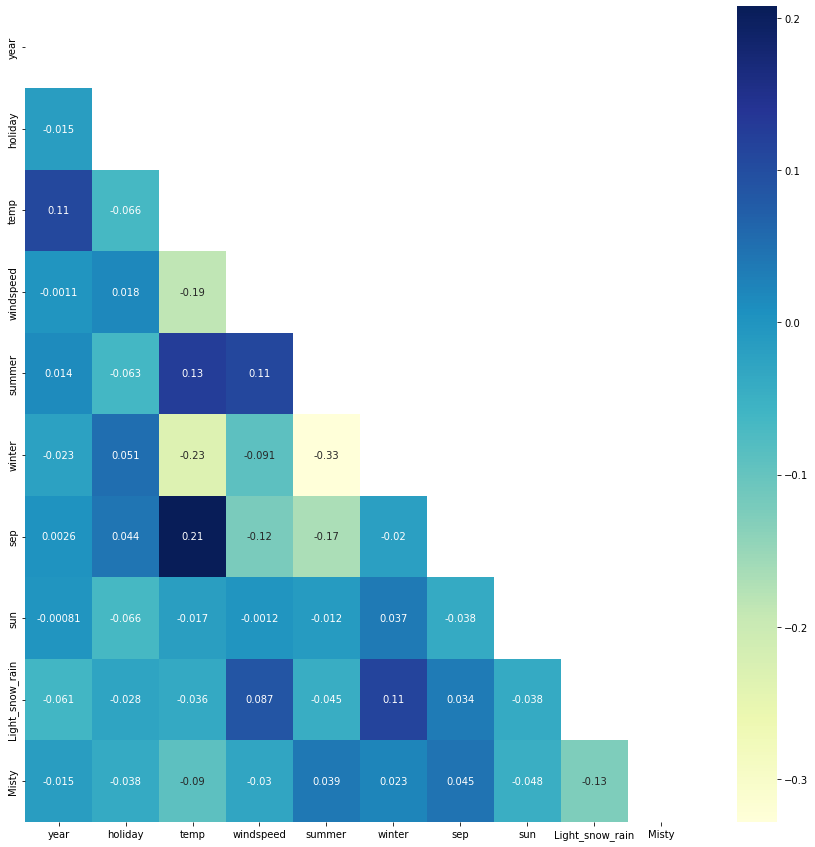

In [73]:
# Plotting correlation between features
plt.figure(figsize=(15,15))
matrix = np.triu(X_train_new.corr())
sns.heatmap(X_train_new.corr(), annot = True, cmap="YlGnBu", mask=matrix)
plt.show()

##### In summary:
##### a) VIF is low which is good.
##### b) There is no significant correlation between features based on the heatmap.
##### Hence we could conclude that there is no significant multicollinearity.

### Testing Homoscedasticity

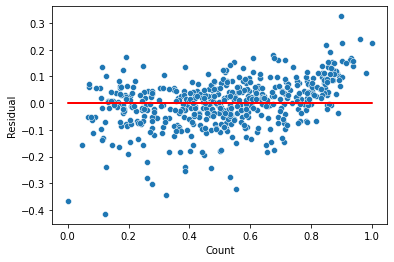

In [87]:
y_train_pred = lm6.predict(X_train_lm6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

##### Looking at this, we could conclude that the variance of the residual / error term is more or less constant for this model.

### Independence of residuals


##### Durbin-Watson value of final model lm6 is 2.103, which signifies there is no autocorrelation.



# Step 7: Making Predictions Using the Final Model

In [75]:
# Applying the scaling on the test sets
numerical_vars = ['temp','atemp','humidity','windspeed','cnt']
df_test[numerical_vars] = scaler.fit_transform(df_test[numerical_vars])

In [76]:
# Head for df_test
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow_rain,Misty
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.496221,0.492359,0.777843,0.443398,0.278853,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.821739,0.749249,0.070765,0.682387,0.569148,0,1,...,0,0,0,0,0,1,0,0,0,0


In [77]:
# Describing df_test
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow_rain,Misty
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.546312,0.530942,0.508750,0.418870,0.516216,0.255708,0.264840,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.249189,0.228159,0.201253,0.188111,0.238702,0.437258,0.442259,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,0.333829,0.358469,0.283817,0.359882,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,0.547913,0.494200,0.402533,0.520241,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,0.720622,0.651165,0.524362,0.682487,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
#Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [79]:
# Adding constant variable to test dataframe
X_test_m6 = sm.add_constant(X_test)

In [80]:
# Creating X_test dataframe with filtered set of features from training dataset

final_features = X_train_new.columns
X_test = X_test[final_features]

In [81]:
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6

,const,year,holiday,temp,windspeed,summer,winter,sep,sun,Light_snow_rain,Misty
184,1.0,0,1,0.837241,0.149393,0,0,0,0,0,1
535,1.0,1,0,0.911423,0.231142,1,0,0,0,0,0
299,1.0,0,0,0.496221,0.443398,0,1,0,0,0,1
221,1.0,0,0,0.890387,0.449707,0,0,0,0,0,0
152,1.0,0,0,0.821739,0.682387,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
400,1.0,1,0,0.224955,0.388364,0,0,0,1,0,1
702,1.0,1,0,0.503971,0.383644,0,1,0,0,0,0
127,1.0,0,0,0.573725,0.132095,1,0,0,1,0,0
640,1.0,1,0,0.745342,0.111637,0,1,0,0,0,1


In [82]:
# Making predictions using the final model (6th model)
y_test_pred = lm6.predict(X_test_lm6)
y_test_pred

184    0.381104
535    0.917515
299    0.388989
221    0.553270
152    0.566697
         ...   
400    0.299386
702    0.716910
127    0.465270
640    0.808749
72     0.256871
Length: 219, dtype: float64

# Step 8: Model Evaluation

In [83]:
# R-squared score on the train dataset 
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)

0.8368483290185642

In [84]:
# R-squared score on the test dataset
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7882508043943567

Text(0, 0.5, 'y_test_pred')

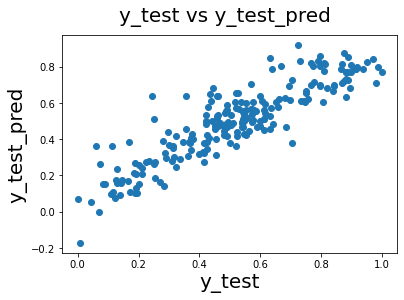

In [85]:
# Plotting y_test and y_pred to visylise the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 20)
plt.ylabel('y_test_pred', fontsize = 20) 

In [86]:
# Getting the coefficients from the final model

round(lm6.params, 4)

const              0.1350
year               0.2327
holiday           -0.1072
temp               0.5471
windspeed         -0.1531
summer             0.0866
winter             0.1323
sep                0.0992
sun               -0.0500
Light_snow_rain   -0.2892
Misty             -0.0819
dtype: float64

### Equation of best fitting line would be:
##### cnt = 0.1350 + 0.2327 * year - 0.1072 * holiday + 0.5471 * temp - 0.1531 * windspeed + 0.0866 * summer + 0.1323 * winter + 0.0992 * sep - 0.0500 * sun -0.2892 * Light_snow_rain -0.0819 * Misty

### Significant features in predicting the demand for shared bikes:
##### -year              
##### -holiday           
##### -temp              
##### -wind speed         
##### -season: summer            
##### -season: winter            
##### -month: september               
##### -day: sunday               
##### -weather situation: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
##### -weather situation: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, MistMisty 